<a href="https://colab.research.google.com/github/gwegayhu/Data-Science-Research/blob/master/ML_Model_for_Yield_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yield Modeling

Project:
Develop a predictive yield model for maize in sub-Saharan Africa using remote sensing data.
Tasks:

Analyze satellite imagery and weather data to identify patterns affecting crop yields.
Create interactive dashboards to visualize yield predictions across different regions.
Develop maps highlighting high- and low-performing areas to guide resource allocation.

The synthetic dataset has been successfully generated. It includes the following features and the predicted maize yield (tons/hectare):

Features:

Latitude, Longitude (geospatial location).
NDVI, EVI (vegetation indices).
Soil Moisture (%).
Rainfall (mm), Temperature (°C), Humidity (%).
Soil Type (sandy, loamy, clay).
Altitude (m).
Target Variable:

Yield (tons/hectare).

In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of synthetic data samples
n_samples = 1000

# Generate synthetic features
latitude = np.random.uniform(-5, 5, n_samples)  # Latitude range for sub-Saharan Africa
longitude = np.random.uniform(10, 40, n_samples)  # Longitude range for sub-Saharan Africa
ndvi = np.random.uniform(0.2, 0.9, n_samples)  # NDVI values (0.2 - 0.9 typical range)
evi = np.random.uniform(0.1, 0.8, n_samples)  # EVI values (0.1 - 0.8 typical range)
soil_moisture = np.random.uniform(10, 50, n_samples)  # Soil moisture in percentage
rainfall = np.random.uniform(200, 1500, n_samples)  # Rainfall (mm) over growing season
temperature = np.random.uniform(18, 35, n_samples)  # Average temperature (°C)
humidity = np.random.uniform(30, 80, n_samples)  # Humidity percentage
soil_type = np.random.choice(['sandy', 'loamy', 'clay'], n_samples)  # Soil type
altitude = np.random.uniform(100, 2000, n_samples)  # Altitude in meters

# Encode soil type as numerical values
soil_type_mapping = {'sandy': 1, 'loamy': 2, 'clay': 3}
soil_type_encoded = np.array([soil_type_mapping[soil] for soil in soil_type])

# Simulate yield (tons/hectare) using a synthetic formula
yield_tons = (
    3 * ndvi +
    2 * evi +
    0.05 * soil_moisture +
    0.002 * rainfall -
    0.1 * np.abs(temperature - 25) -  # Penalize deviations from optimal temperature (25°C)
    0.02 * altitude / 1000 +  # Penalize higher altitudes slightly
    0.5 * (soil_type_encoded == 2) -  # Loamy soil is more productive
    0.3 * (soil_type_encoded == 1)    # Sandy soil is less productive
)

# Add some noise to simulate real-world variability
yield_tons += np.random.normal(0, 0.2, n_samples)

# Create a DataFrame
synthetic_data = pd.DataFrame({
    'Latitude': latitude,
    'Longitude': longitude,
    'NDVI': ndvi,
    'EVI': evi,
    'Soil Moisture (%)': soil_moisture,
    'Rainfall (mm)': rainfall,
    'Temperature (°C)': temperature,
    'Humidity (%)': humidity,
    'Soil Type': soil_type,
    'Altitude (m)': altitude,
    'Yield (tons/hectare)': yield_tons
})

# Display the first few rows of the synthetic data
synthetic_data.head()


,Latitude,Longitude,NDVI,EVI,Soil Moisture (%),Rainfall (mm),Temperature (°C),Humidity (%),Soil Type,Altitude (m),Yield (tons/hectare)
0,-1.254599,15.553988,0.383194,0.570892,32.879835,711.726176,29.020368,31.939973,loamy,220.857093,5.555794
1,4.507143,26.257028,0.372885,0.657677,42.217293,815.466357,20.930568,39.338626,loamy,520.049860,6.791520
2,2.319939,36.188375,0.834378,0.275328,40.406437,1310.911611,32.830708,71.562290,loamy,1073.635561,7.607274
3,0.986585,31.966747,0.374682,0.537412,16.155996,642.005702,28.422976,68.338418,clay,1137.214863,4.193749
4,-3.439814,34.196834,0.390365,0.500222,15.969979,1330.544590,20.672466,47.532135,sandy,165.096133,4.545201


Condcut Model Comparison

In [15]:
# Prepare the dataset for modeling
X = synthetic_data.drop(['Yield (tons/hectare)', 'Soil Type'], axis=1)  # Features
X['Soil Type'] = synthetic_data['Soil Type'].map(soil_type_mapping)  # Encode soil type numerically
y = synthetic_data['Yield (tons/hectare)']  # Target

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor # Import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score # Corrected the import to r2_score


In [23]:
# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Predict on the test set
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.2712444870395252, 0.8115106526250829)

The predictive yield model has been trained using a Random Forest Regressor, with the following evaluation results on the test set:

Mean Squared Error (MSE): 0.271 (lower is better).
R² Score: 0.812 (closer to 1 indicates better performance).

We’ll start with visualizing feature importance and then move to the next steps.

Step 1: Visualize Feature Importance

I’ll calculate and plot the feature importance for the Gradient Boosting model. Let me do that now.

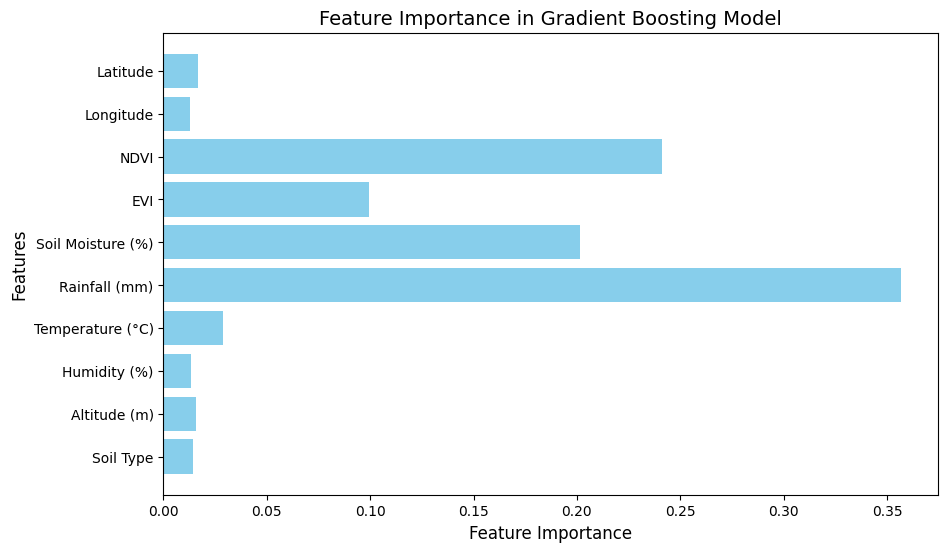

In [34]:
import matplotlib.pyplot as plt

# Train the Gradient Boosting model for feature importance analysis
gb_model = RandomForestRegressor(n_estimators=100, random_state=42) # Changed RandomForesstRegressor to RandomForestRegressor
gb_model.fit(X_train, y_train)

# Get feature importance
feature_importance = gb_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Gradient Boosting Model', fontsize=14)
plt.gca().invert_yaxis()
plt.show()